## Fashion MNIST CPPN - Samples

Let's just take a look at the kinds of images this network is producing:

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from notebook_utils import imshow,            \
                           generate_animation

Let's load up the sampler which will load a previously-trained model that I included in the repo. This model took ~20 minutes to train, I think, on one of our GPU machines at the office.

In [2]:
%run -i sampler.py
sampler = Sampler()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Please use tf.global_variables instead.
loading model:  save/model.ckpt-23
INFO:tensorflow:Restoring parameters from save/model.ckpt-23


In [3]:
np.random.seed(1) # Use a seed so you get the same results as me when running this notebook.

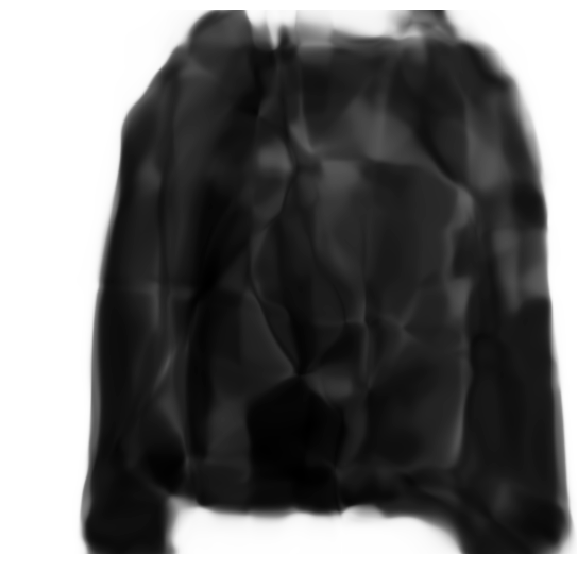

In [4]:
z = sampler.generate_z()
x = sampler.generate(z)
sampler.show_image(x)

A jacket-like thing! Pretty cool.

Let's now take a look at how the network interprets a sampling of specific classes. The fashion-MNIST repo handily lists the classes like so:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [5]:
def sample_pair (sampler, label=0, shape=(200,200)):
    x_dim, y_dim      = shape
    original_image    = sampler.get_random_specific_mnist(label=label)
    z                 = sampler.encode(original_image)
    interpreted_image = sampler.generate(z, x_dim=x_dim, y_dim=y_dim)

    return interpreted_image, original_image, z

Extracting fashion-MNIST_data/train-images-idx3-ubyte.gz
Extracting fashion-MNIST_data/train-labels-idx1-ubyte.gz
Extracting fashion-MNIST_data/t10k-images-idx3-ubyte.gz
Extracting fashion-MNIST_data/t10k-labels-idx1-ubyte.gz


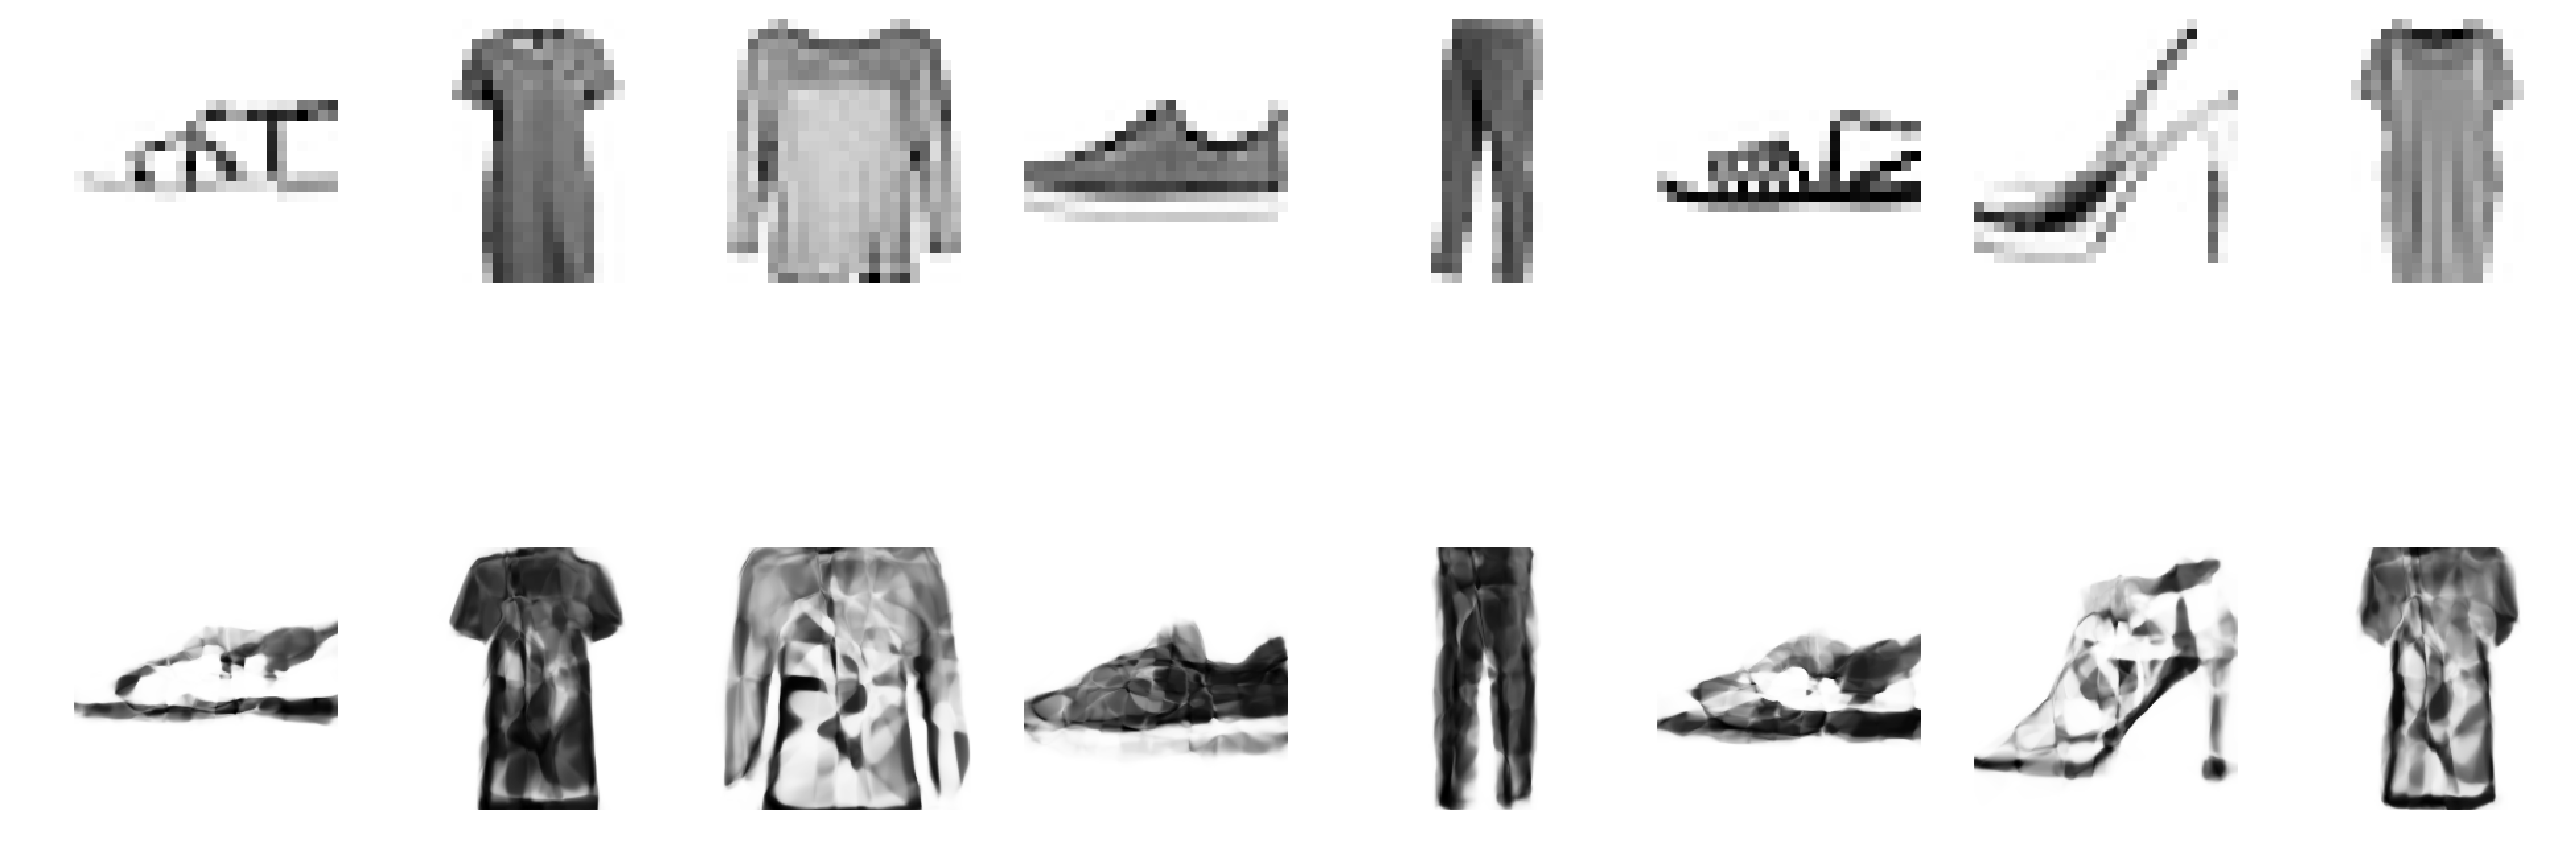

In [6]:
rows  = 2
cols  = 8
pos   = 1
shape = (200,200)
pairs = [ sample_pair(sampler, label=np.random.randint(10), shape=shape) for _ in range(cols) ]

plt.figure(figsize=(20,8), dpi=160)

for i in range(rows):
    for j in range(cols):
        k = (i+1) % 2
        
        plt.subplot(rows, cols, pos)
        
        img = np.squeeze(pairs[j][k])
        
        plt.imshow(img, interpolation='none', cmap='Greys')
        plt.axis('off')
        pos += 1
    
        plt.show()

The top row is the original Fashion-MNIST images, and the bottom row is the interpreted versions in the CPPN.

Kind of interesting! It seems to largely know how to draw a variety of classes. It also struggles with small/fine details, and has developed it's own sort of weird style when it needs to colour in lighter parts of the images.

Now we can look at how it interpolates between different classes!

In [7]:
generate_animation(sampler, [ z for _, _, z in pairs ], shape=shape)

100%|██████████| 100/100 [01:54<00:00,  1.17s/it]


We can also do an interpolation in a single-space; let's say shoes:

In [8]:
def animate_classes (classes, count=3, shape=(200,200)):
    zs = [ sample_pair(sampler, label=np.random.choice(classes), shape=shape)[2] for _ in range(count) ]
    return generate_animation(sampler, zs, shape=shape)

In [9]:
animate_classes([5,7,9], shape=shape)

100%|██████████| 100/100 [03:19<00:00,  1.81s/it]


Tops!

In [10]:
animate_classes([0,4,6], count=4, shape=shape)

100%|██████████| 100/100 [05:19<00:00,  3.85s/it]


### In conclusion ... 

Fashion-MNIST is an awesome little dataset to play around with. Props to Zalando for putting out a dataset that was completely compatible with the original MNIST structure; I barely had to change a thing to made this codebase work with it!

Also, hardmaru is my current hero of machine learning.

There's heaps to do here. For more inspiration, take a look at hardmaru's posts:

- http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/
- http://blog.otoro.net/2016/06/02/generating-large-images-from-latent-vectors-part-two/

also, keep an eye out, because Silverpond has something cool cooking in this space!